In [1]:
!pip install pandas numpy openpyxl nbformat ipykernel plotly


Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)'))) - skipping


In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('disease.csv')

In [5]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'Frequency')

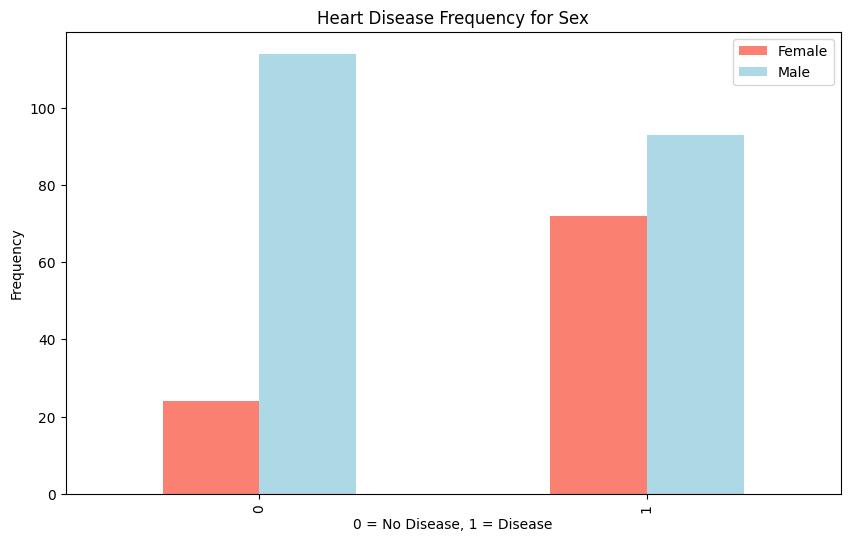

In [8]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10, 6), color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female", "Male"])
plt.ylabel("Frequency")


Text(0, 0.5, 'frequencia cardiaca')

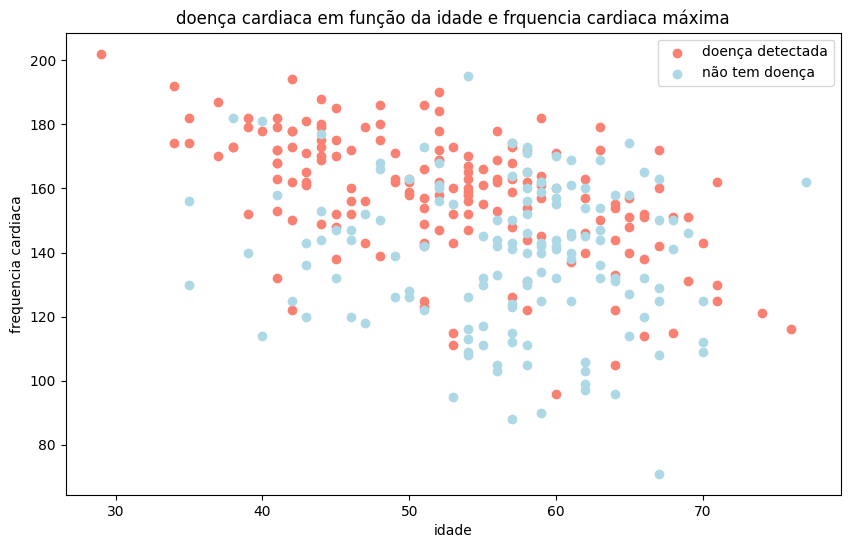

In [9]:
plt.figure(figsize=(10, 6))

#valores positivos
plt.scatter(df["age"] [df["target"] == 1], df["thalach"][df["target"]== 1], c="salmon")

#valores negativos
plt.scatter(df["age"][df["target"] == 0], df["thalach"][df["target"] ==0], c="lightblue")

plt.title("doença cardiaca em função da idade e frquencia cardiaca máxima")
plt.xlabel("idade")
plt.legend(["doença detectada", "não tem doença"])
plt.ylabel("frequencia cardiaca")

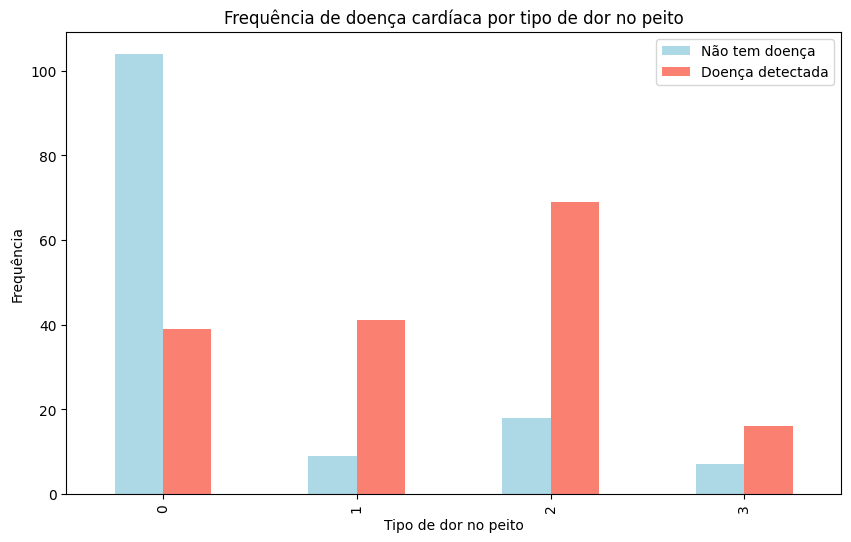

In [10]:
cross_tab = pd.crosstab(df["cp"], df["target"])


cross_tab.plot(kind="bar", figsize=(10, 6), color=["lightblue", "salmon"])

plt.title("Frequência de doença cardíaca por tipo de dor no peito")
plt.xlabel("Tipo de dor no peito")
plt.ylabel("Frequência")
plt.legend(["Não tem doença", "Doença detectada"])


In [11]:
X = df.drop("target", axis=1)
Y = df["target"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
len(X_train), len(Y_train)

(242, 242)

In [14]:
len(X_test), len(Y_test)

(61, 61)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()
          }
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    
    return model_scores

In [17]:
fit_and_score(models=models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.9508196721311475,
 'Random Forest': 0.9016393442622951}

In [18]:
import matplotlib.pyplot as plt
from collections import defaultdict

def mapper(collumn):
    idade = int(collumn['age'])
    faixa = f"{(idade // 10) * 10}-{(idade // 10) * 10 + 9}"
    colesterol = int(collumn['chol'])
    return (faixa, colesterol)

In [19]:
grupos = defaultdict(list)
for row in df:
    faixa, colesterol = mapper(row)
    grupos[faixa].append(colesterol)

faixas = sorted(grupos.keys())
medias = [sum(grupos[faixa]) / len(grupos[faixa]) for faixa in faixas]

plt.figure(figsize=(8, 5))
plt.bar(faixas, medias, color='skyblue')
plt.xlabel('Faixa Etária')
plt.ylabel('Colesterol Médio')
plt.title('Colesterol Médio por Faixa Etária')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

TypeError: string indices must be integers